#One million is a lot

This notebook presents analysis of data from the first million page views on my blog, Probably Overthinking It.

Copyright 2015 Allen Downey

MIT License: http://opensource.org/licenses/MIT

In [1]:
%matplotlib inline

In [7]:
import pandas as pd

def read_table(filename):
    fp = open(filename)
    t = pd.read_html(fp)
    table = t[5]
    return table

In [13]:
table1 = read_table('blogger1.html')
table1.shape

(100, 8)

In [14]:
table2 = read_table('blogger2.html')
table2.shape

(20, 8)

In [18]:
table = pd.concat([table1, table2], ignore_index=True)
table.shape

(120, 9)

In [19]:
import string
chars = string.ascii_letters + ' '

def convert(s):
    return (int(s.rstrip(chars)))

def clean(s):
    i = s.find('Edit')
    return s[:i]

In [20]:
table['title'] = table[1].apply(clean)
table.title

0                                   One million is a lot
1                    When will I win the Great Bear Run?
2                                    Bayes meets Fourier
3                First babies are more likely to be late
4                Bayesian analysis of gluten sensitivity
5                             Bayes theorem in real life
6                   The Inspection Paradox is Everywhere
7                                 Orange is the new stat
8                     Will Millennials Ever Get Married?
9                                     Bayesian Billiards
10                           The Sleeping Beauty Problem
11             Hypothesis testing is only mostly useless
12                 Two hour marathon by 2041 -- probably
13      Bayesian survival analysis for "Game of Thrones"
14            Statistical inference is only mostly wrong
15          Upcoming talk on survival analysis in Python
16            Bayesian analysis of match rates on Tinder
17       Godless freshmen: now 

In [21]:
table['plusses'] = table[4].fillna(0)
table.plusses.head()

0    0
1    1
2    7
3    2
4    9
Name: plusses, dtype: float64

In [24]:
table['comments'] = table[5].apply(convert)
table.comments.head()

0    0
1    1
2    1
3    3
4    1
Name: comments, dtype: int64

In [25]:
table['views'] = table[6].apply(convert)
table.views

0           0
1         723
2        2363
3         944
4        3110
5        2514
6       30484
7        2131
8         589
9        1273
10       2348
11       1816
12       2891
13      32406
14       4666
15       1242
16       7602
17       1491
18       2254
19       1193
20        648
21       1789
22       3040
23        819
24       3090
25       1621
26       6456
27       1834
28       1057
29       1536
        ...  
90       9454
91       1153
92       2332
93      48836
94      34384
95       3367
96       3797
97       1929
98        885
99          0
100         0
101      2162
102      1520
103      4246
104       203
105      1445
106      1745
107      1083
108      2849
109      1379
110      3847
111       815
112       513
113      3066
114    130722
115     17876
116      1468
117       289
118       725
119       396
Name: views, dtype: int64

In [26]:
table['date'] = pd.to_datetime(table[7])
table.date.head()

0   2015-11-01
1   2015-10-26
2   2015-10-23
3   2015-09-23
4   2015-09-01
Name: date, dtype: datetime64[ns]

In [34]:
table = table[table.views > 0]
table.shape

(115, 13)

In [38]:
table.index = range(115, 0, -1)
table.title

115                  When will I win the Great Bear Run?
114                                  Bayes meets Fourier
113              First babies are more likely to be late
112              Bayesian analysis of gluten sensitivity
111                           Bayes theorem in real life
110                 The Inspection Paradox is Everywhere
109                               Orange is the new stat
108                   Will Millennials Ever Get Married?
107                                   Bayesian Billiards
106                          The Sleeping Beauty Problem
105            Hypothesis testing is only mostly useless
104                Two hour marathon by 2041 -- probably
103     Bayesian survival analysis for "Game of Thrones"
102           Statistical inference is only mostly wrong
101         Upcoming talk on survival analysis in Python
100           Bayesian analysis of match rates on Tinder
99       Godless freshmen: now more Nones than Catholics
98              Bayesian predic

In [39]:
dates = table.date.sort_values()
diffs = dates.diff()
diffs.head()

1      NaT
2   6 days
3   7 days
4   7 days
5   9 days
Name: date, dtype: timedelta64[ns]

In [40]:
diffs.dropna().describe()

count                        114
mean     15 days 09:41:03.157894
std      20 days 04:36:55.930513
min              1 days 00:00:00
25%              5 days 00:00:00
50%             10 days 00:00:00
75%             17 days 18:00:00
max            180 days 00:00:00
Name: date, dtype: object

In [41]:
table.sort_values(by=['views'], ascending=False)[['title', 'views', 'date']].head(20)

,title,views,date
6,Are first babies more likely to be late?,130722,2011-02-07
25,All your Bayes are belong to us!,48836,2011-10-27
24,My favorite Bayes's Theorem problems,34384,2011-10-20
103,"Bayesian survival analysis for ""Game of Thrones""",32406,2015-03-25
110,The Inspection Paradox is Everywhere,30484,2015-08-18
41,Bayesian statistics made simple,23892,2012-03-14
5,Yet another reason SAT scores are non-predictive,17876,2011-02-02
72,Are your data normal? Hint: no.,16152,2013-08-07
36,Freshman hordes even more godless!,10826,2012-01-29
34,Think Complexity,10670,2012-01-23


In [56]:
table.sort_values(by=['views'], ascending=True)[['title', 'views', 'date']].head(20)

,title,views,date
16,Statistics Workshop,203,2011-05-17
3,Obesity epidemic cured!,289,2011-01-17
1,Proofiness and elections,396,2011-01-04
45,Fog warning system: part two,504,2012-04-20
8,Moving the goalposts,513,2011-02-24
108,Will Millennials Ever Get Married?,589,2015-07-13
96,The Rock Hyrax Problem,648,2014-12-04
62,Belly Button Biodiversity: Part Four,675,2013-03-22
46,Fog warning system: part three,704,2012-04-25
115,When will I win the Great Bear Run?,723,2015-10-26


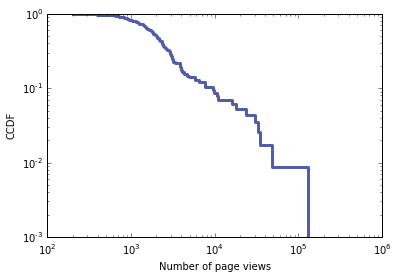

In [55]:
import thinkstats2
import thinkplot

cdf = thinkstats2.Cdf(table.views)

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel ='Number of page views', xscale='log', 
                 ylabel='CCDF', yscale='log', 
                 legend=False)

In [45]:
table.sort_values(by=['comments'], ascending=False)[['title', 'comments', 'date']].head(5)

,title,comments,date
25,All your Bayes are belong to us!,56,2011-10-27
106,The Sleeping Beauty Problem,53,2015-06-12
28,Girl Named Florida solutions,25,2011-11-10
110,The Inspection Paradox is Everywhere,23,2015-08-18
54,Secularization in America: part six,14,2012-07-10


In [44]:
table.sort_values(by=['plusses'], ascending=False)[['title', 'plusses', 'date']].head(5)

,title,plusses,date
110,The Inspection Paradox is Everywhere,909,2015-08-18
25,All your Bayes are belong to us!,59,2011-10-27
103,"Bayesian survival analysis for ""Game of Thrones""",54,2015-03-25
67,Software engineering practices for graduate st...,34,2013-05-06
102,Statistical inference is only mostly wrong,31,2015-03-02
